In [3]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('election_results_2024.csv')

In [7]:
party_votes = data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)
data['Margin'] = pd.to_numeric(data['Margin'], errors='coerce')

# Party with highest and lowest margin of victory
highest_margin = data.loc[data['Margin'].idxmax()]
lowest_margin = data.loc[data['Margin'].idxmin()]

In [9]:
# Convert 'Margin' column to numeric, handling errors
data['Margin'] = pd.to_numeric(data['Margin'], errors='coerce')

# Group and sum, filling any remaining NaN values with 0
party_votes = data.groupby('Leading Party')['Margin'].sum().fillna(0).sort_values(ascending=False)


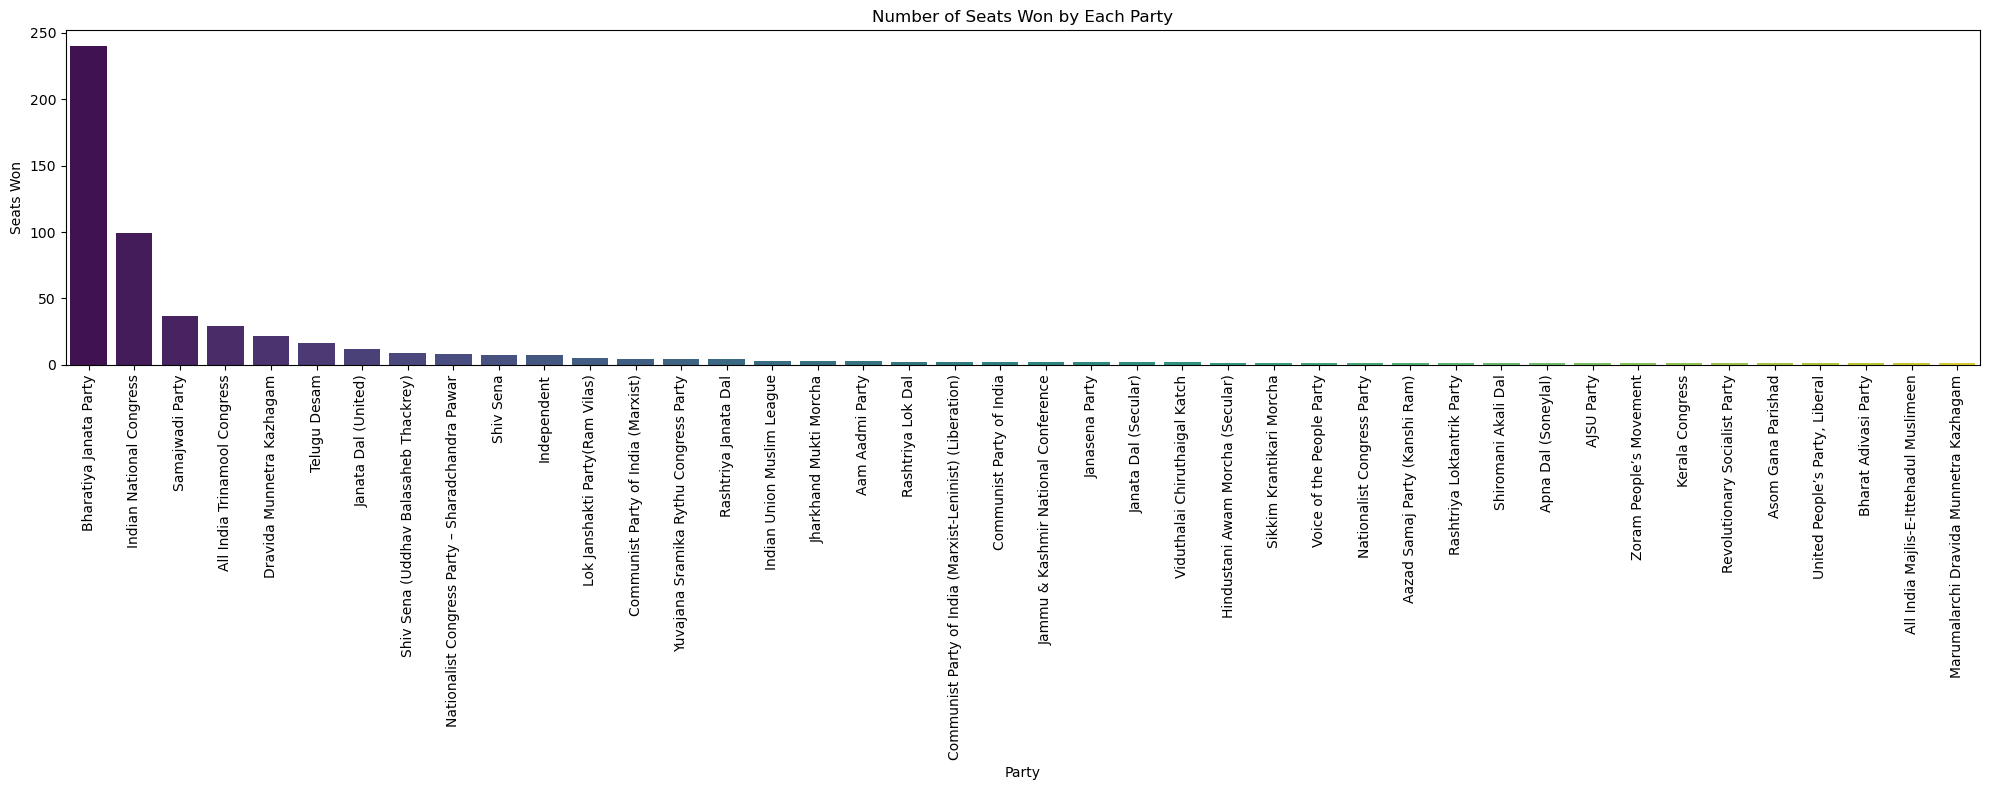

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate number of seats won by each party
seats_won = data['Leading Party'].value_counts()

# Plot number of seats won by each party
plt.figure(figsize=(20, 8))
sns.barplot(x=seats_won.index, y=seats_won.values, hue=seats_won.index, palette='viridis', dodge=False, legend=False)

# Customize plot labels and title
plt.title('Number of Seats Won by Each Party')
plt.xlabel('Party')
plt.ylabel('Seats Won')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


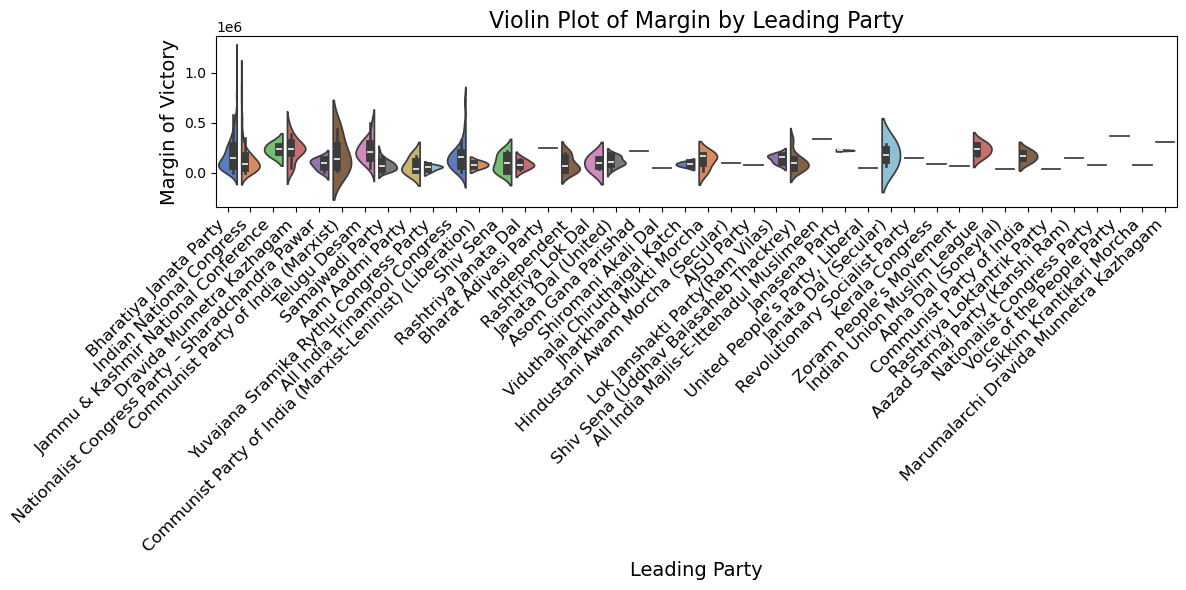

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Use violinplot with 'hue' set to 'Leading Party' to specify palette
sns.violinplot(x='Leading Party', y='Margin', data=data, hue='Leading Party', palette='muted', split=True)

# Customize plot labels and title
plt.title('Violin Plot of Margin by Leading Party', fontsize=16)
plt.xlabel('Leading Party', fontsize=14)
plt.ylabel('Margin of Victory', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Remove the legend to avoid unnecessary duplication
plt.legend().remove()

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()


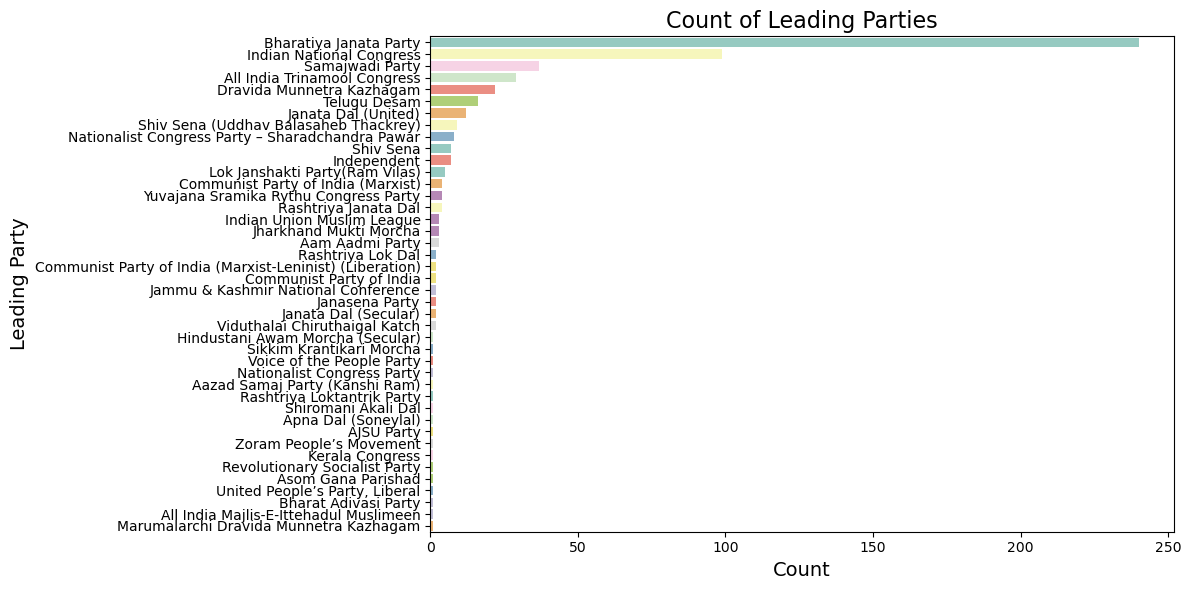

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Use countplot with 'hue' set to 'Leading Party' to specify palette
sns.countplot(y='Leading Party', data=data, order=data['Leading Party'].value_counts().index, hue='Leading Party', palette='Set3', orient='v', dodge=False, legend=False)

# Customize plot labels and title
plt.title('Count of Leading Parties', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Leading Party', fontsize=14)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()


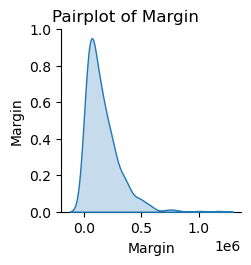

In [19]:
# Pairplot of numeric data
sns.pairplot(data[['Margin']], diag_kind='kde')
plt.suptitle('Pairplot of Margin', y=1.02)
plt.show()

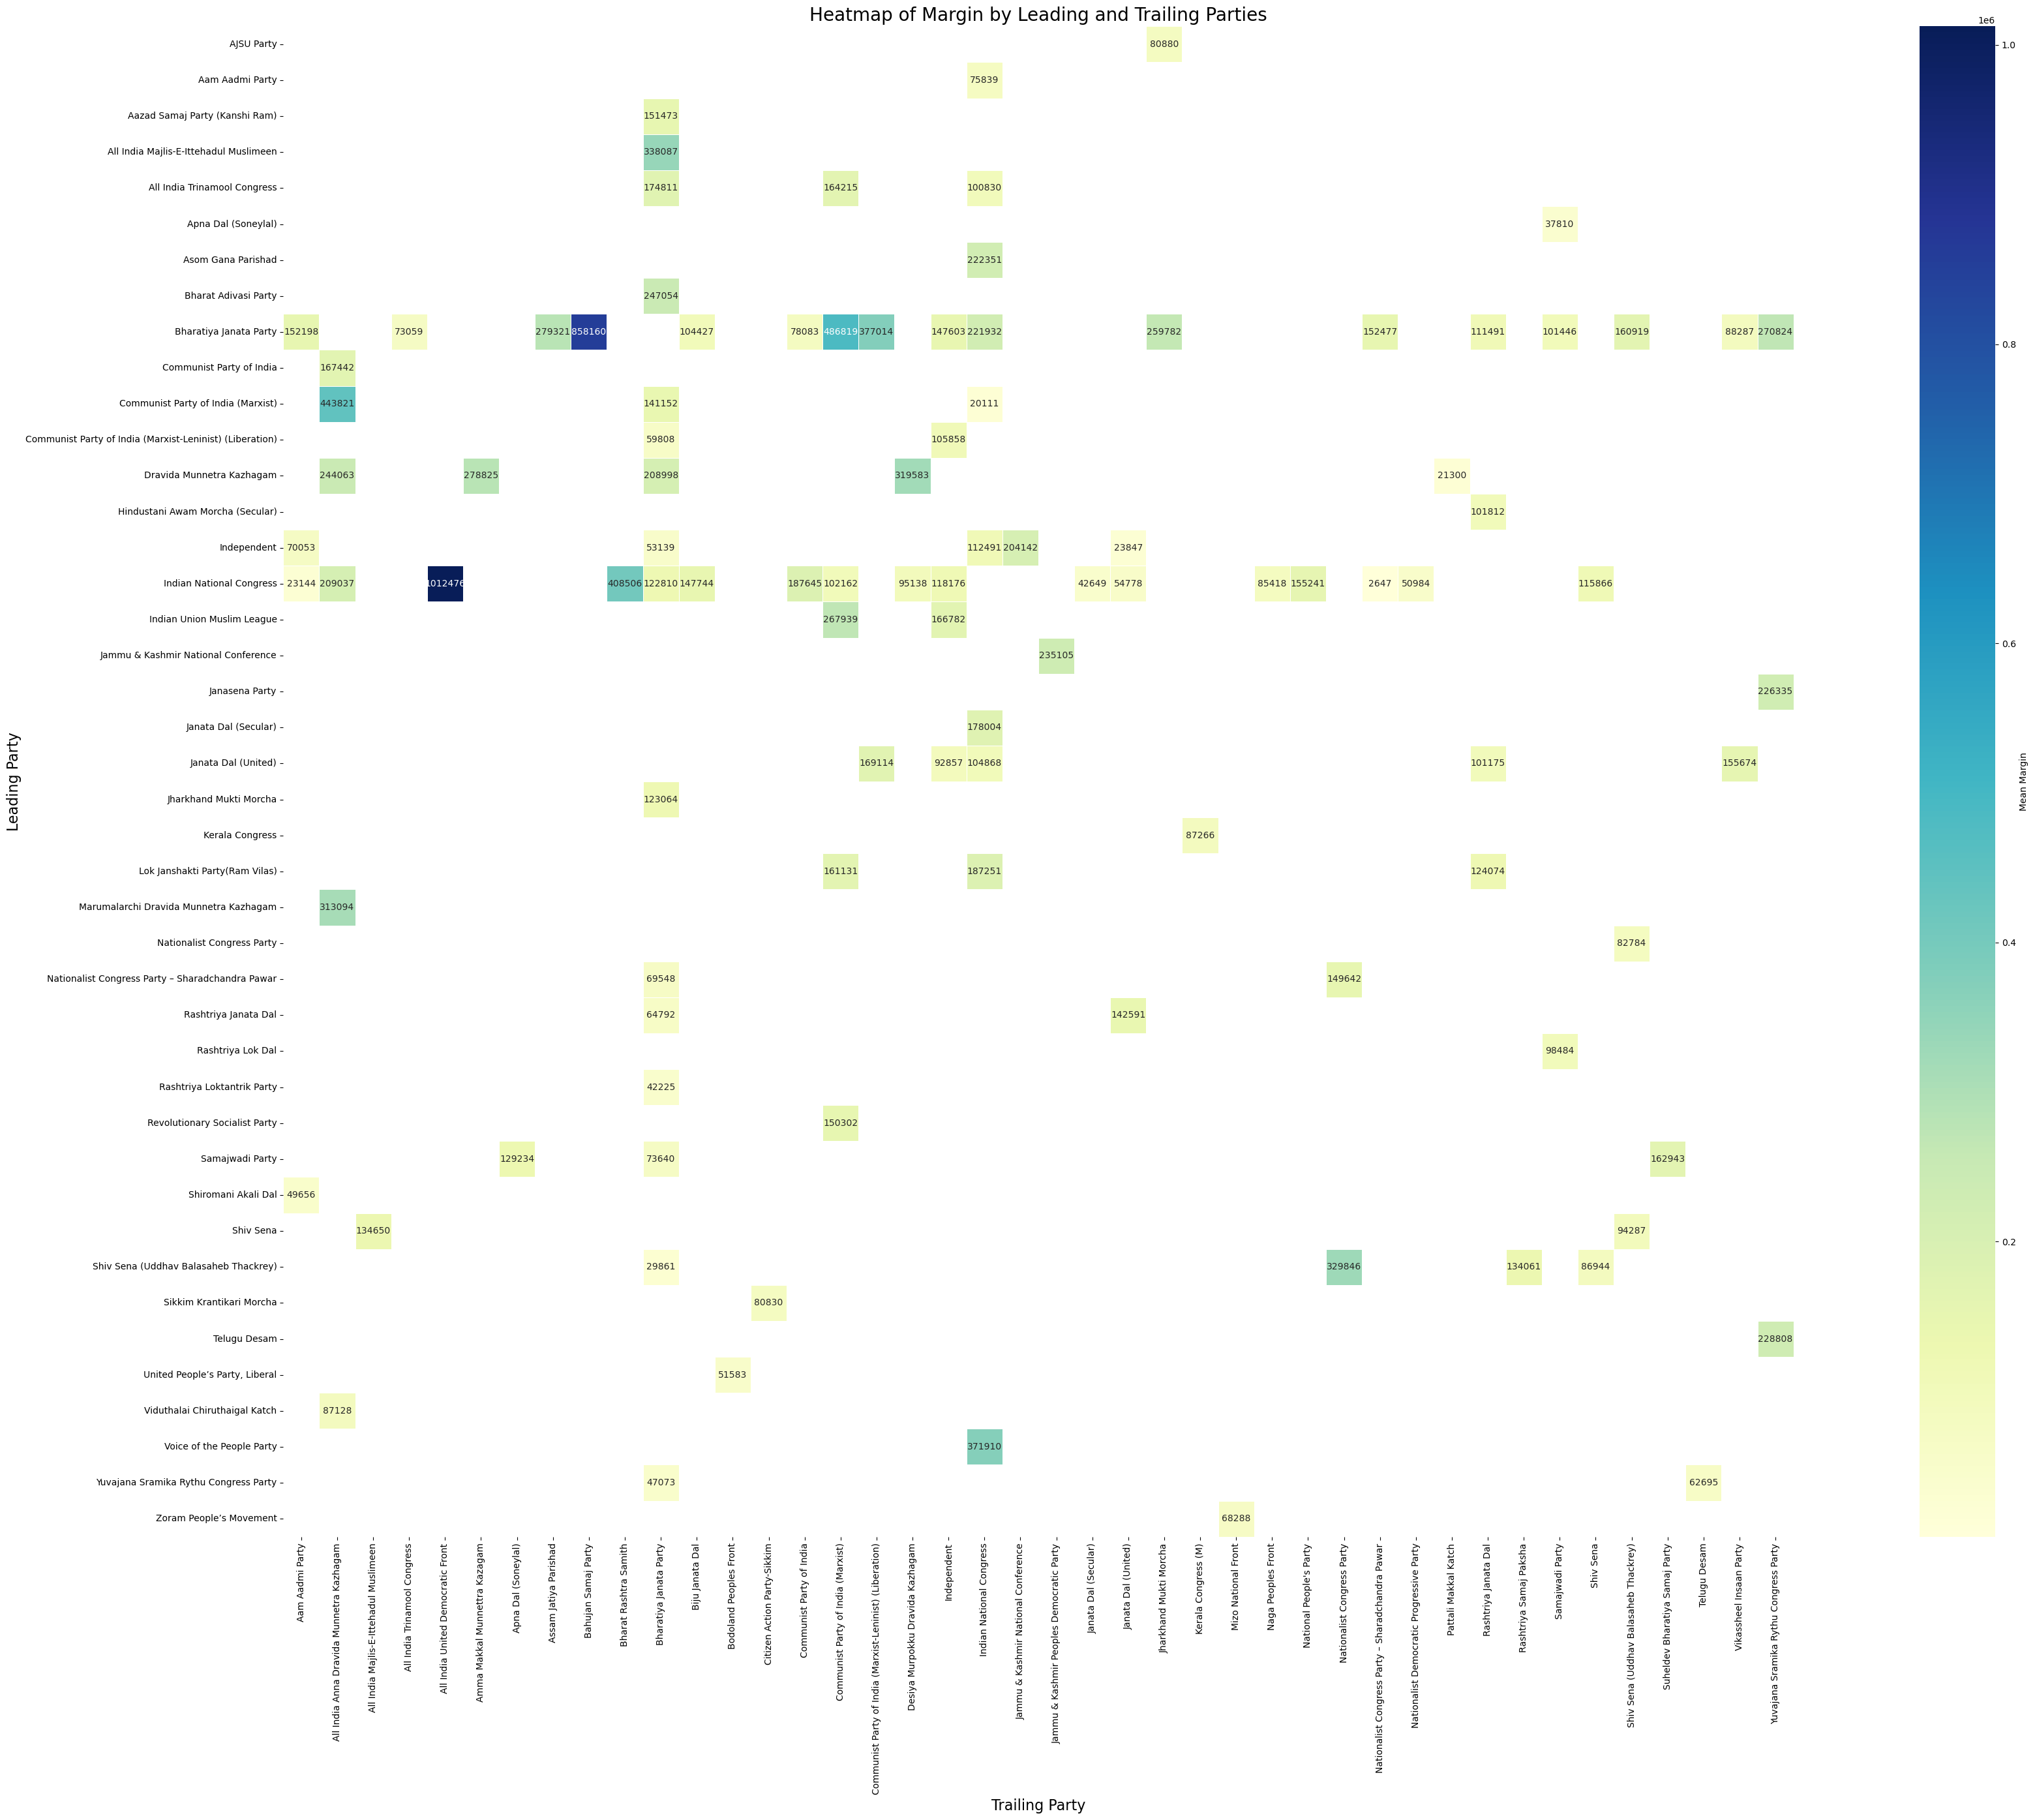

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a pivot table of margins
pivot_table = data.pivot_table(values='Margin', index='Leading Party', columns='Trailing Party', aggfunc='mean')

# Set up the figure size and heatmap with increased DPI
plt.figure(figsize=(40, 28), dpi=100)

# Create the heatmap with annotations and colormap
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlGnBu', cbar_kws={'label': 'Mean Margin'}, linewidths=0.5, annot_kws={'size': 10}, square=True)

# Customize plot labels and title
plt.title('Heatmap of Margin by Leading and Trailing Parties', fontsize=20)
plt.ylabel('Leading Party', fontsize=16)
plt.xlabel('Trailing Party', fontsize=16)

# Rotate y-axis labels for better alignment
plt.yticks(rotation=0)  # Horizontal y-axis labels

# Adjust layout to prevent overlapping of labels and ticks
plt.tight_layout()

# Display the plot
plt.show()


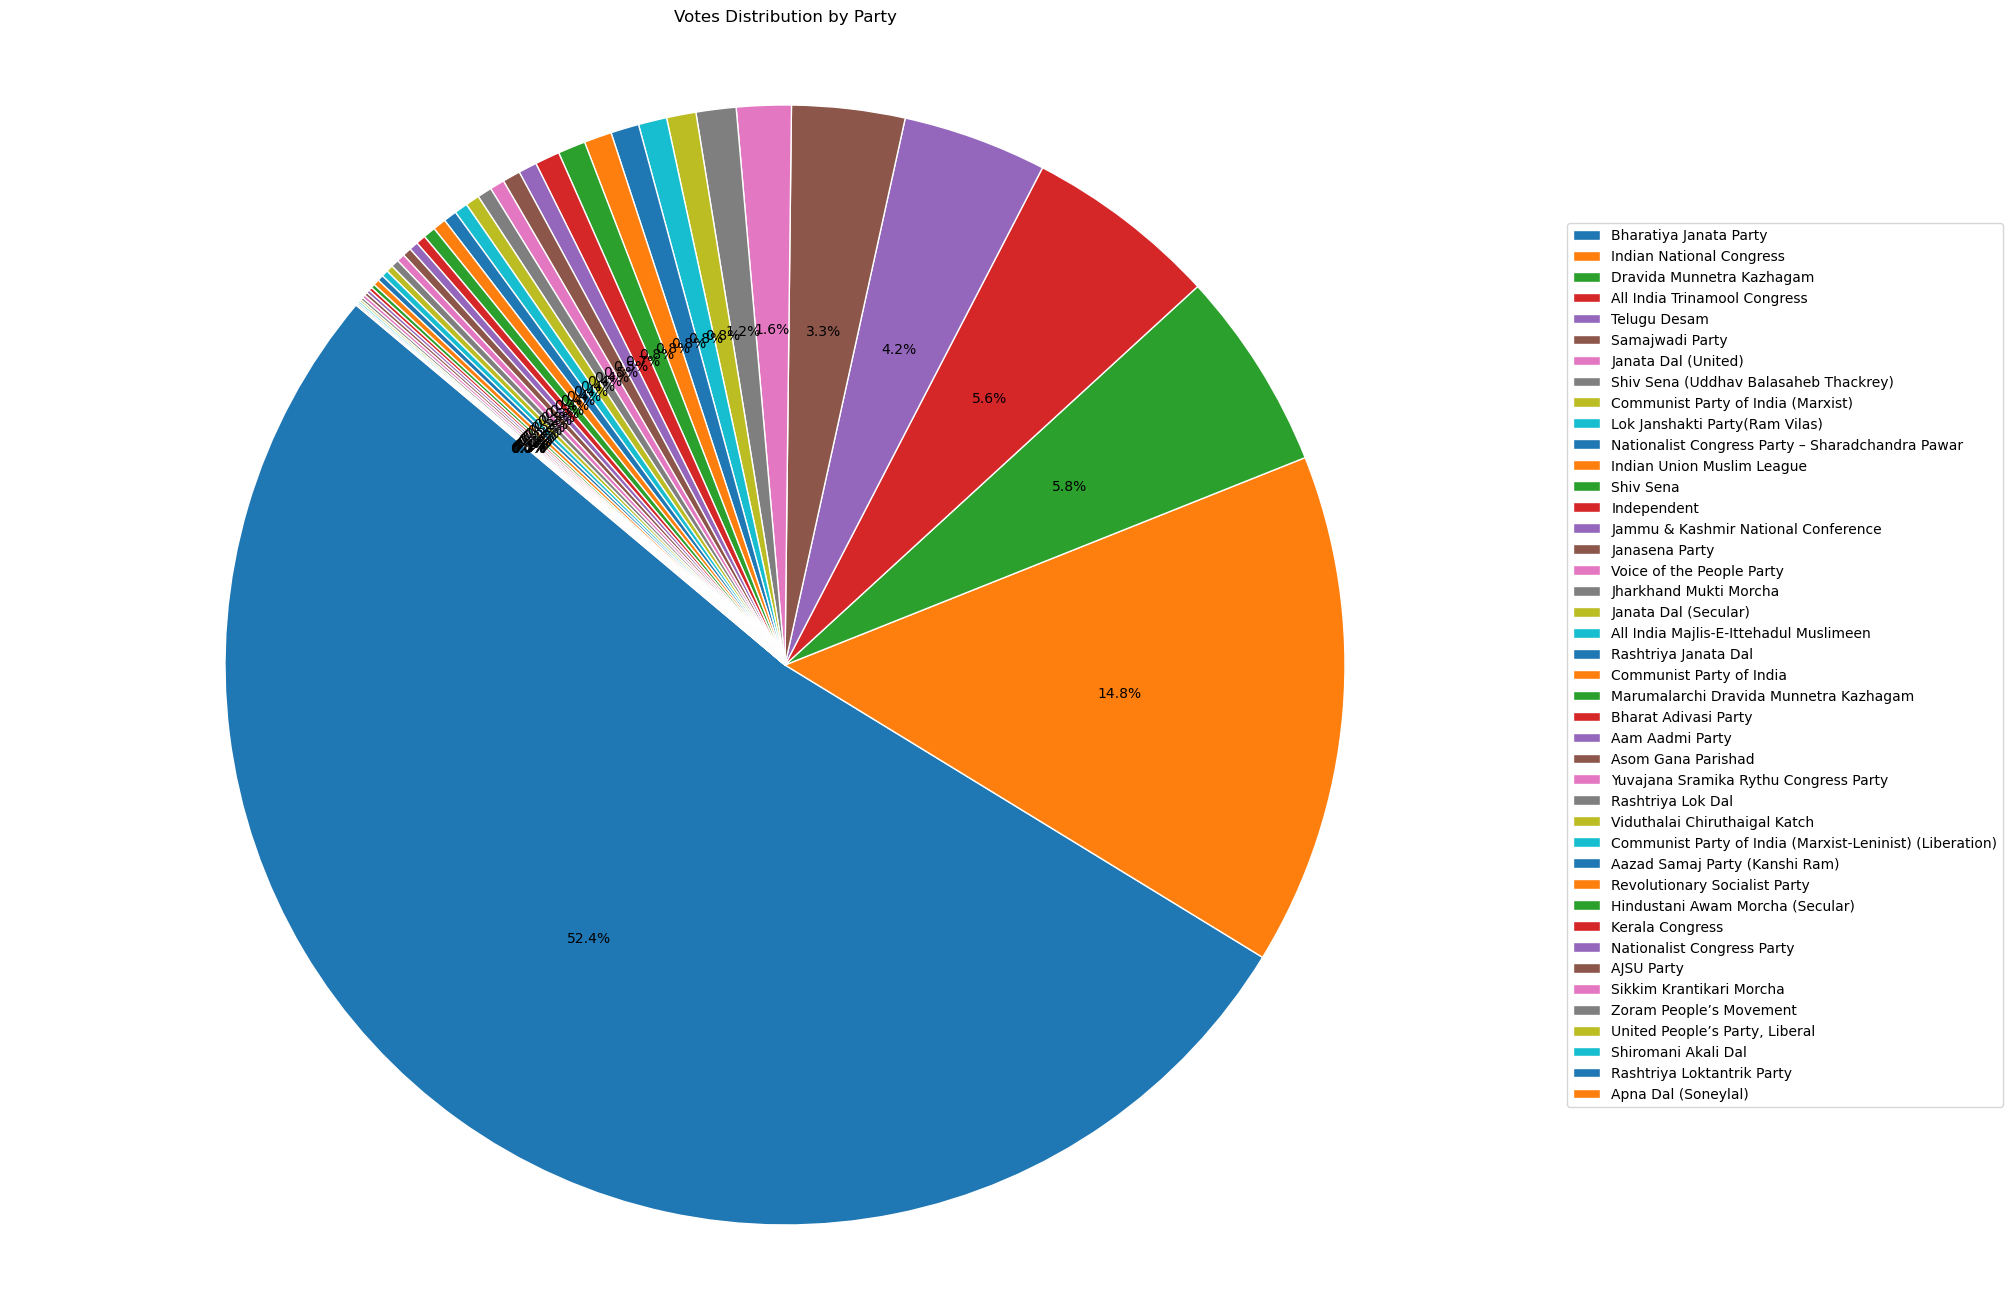

In [23]:
party_votes = data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)

# Plot pie chart
plt.figure(figsize=(20, 16))
wedges, texts, autotexts = plt.pie(party_votes, labels=None, autopct='%1.1f%%', startangle=140, wedgeprops=dict(edgecolor='w'))
plt.title('Votes Distribution by Party', pad=20)
plt.axis('equal')

plt.legend(labels=party_votes.index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')


plt.show()

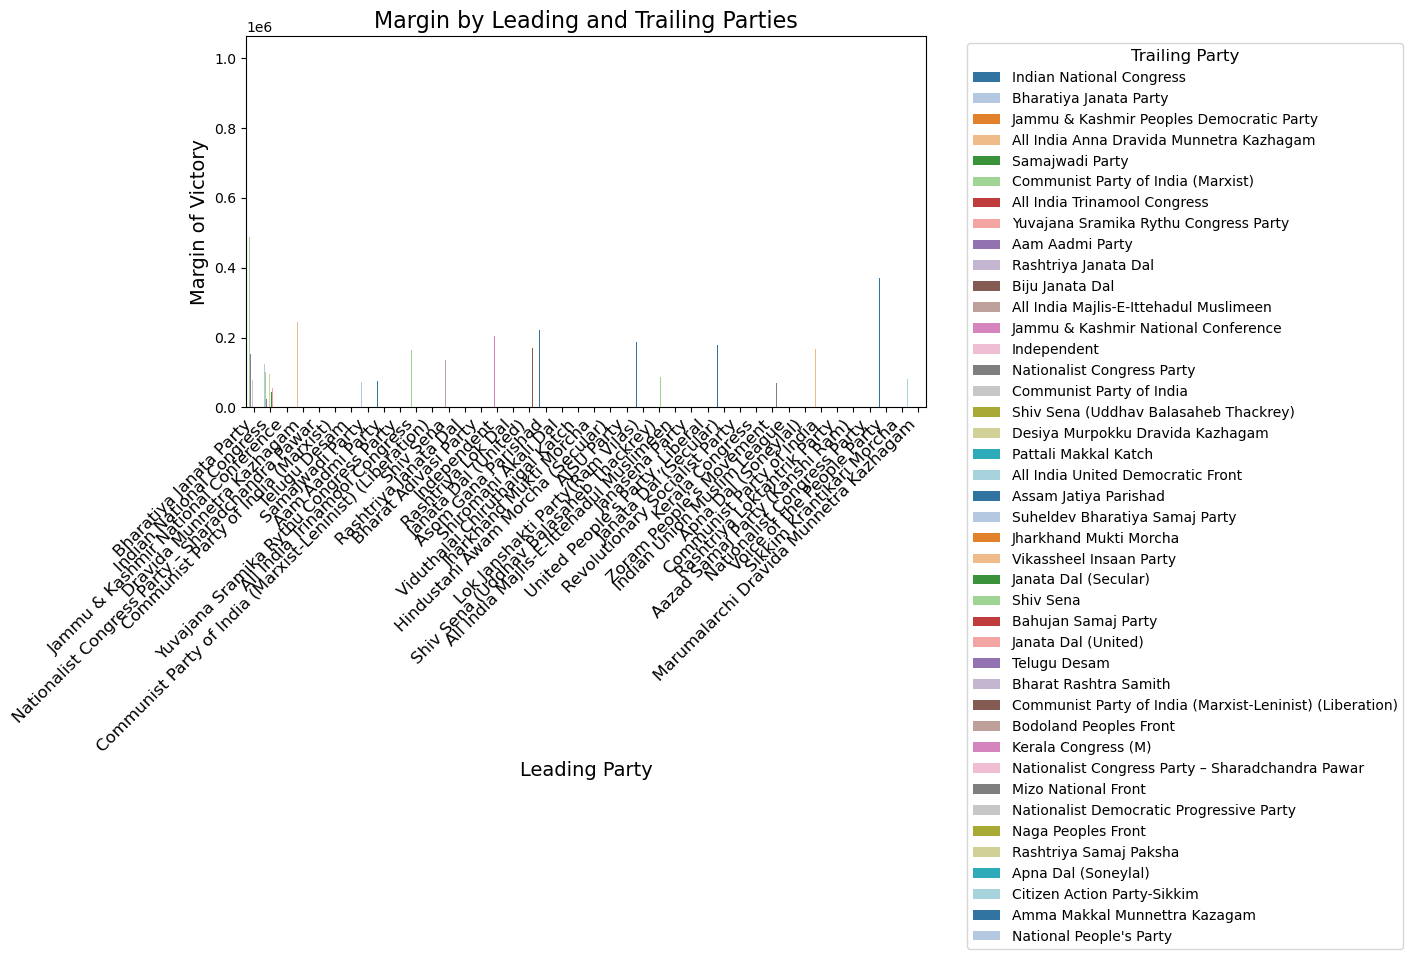

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))  # Adjust figure size for better spacing

# Create the bar plot
sns.barplot(x='Leading Party', y='Margin', hue='Trailing Party', data=data, errorbar=None, palette='tab20')

# Customize plot labels and title
plt.title('Margin by Leading and Trailing Parties', fontsize=16)
plt.xlabel('Leading Party', fontsize=14)
plt.ylabel('Margin of Victory', fontsize=14)

# Rotate x-axis labels for better readability and adjust alignment
plt.xticks(rotation=45, ha='right', fontsize=12)

# Move the legend outside the plot to avoid overlapping
plt.legend(title='Trailing Party', title_fontsize='large', fontsize='medium', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent clipping of labels and legend
plt.tight_layout()

# Display the plot
plt.show()


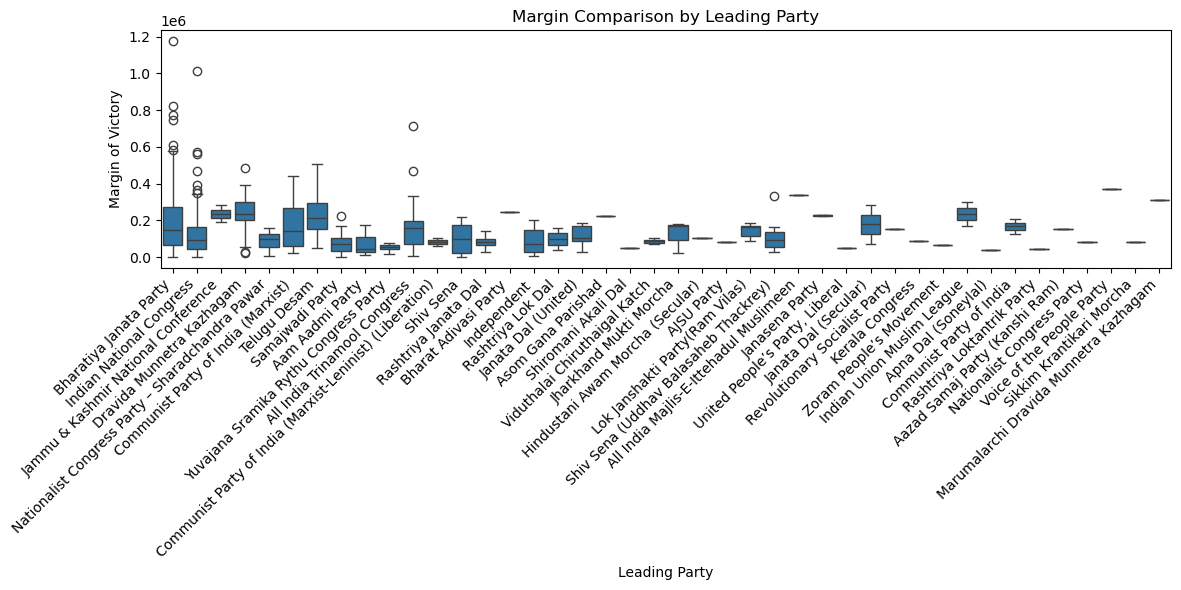

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Leading Party', y='Margin', data=data)
plt.title('Margin Comparison by Leading Party')
plt.xlabel('Leading Party')
plt.ylabel('Margin of Victory')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [31]:
numeric_data = data.select_dtypes(include='number')

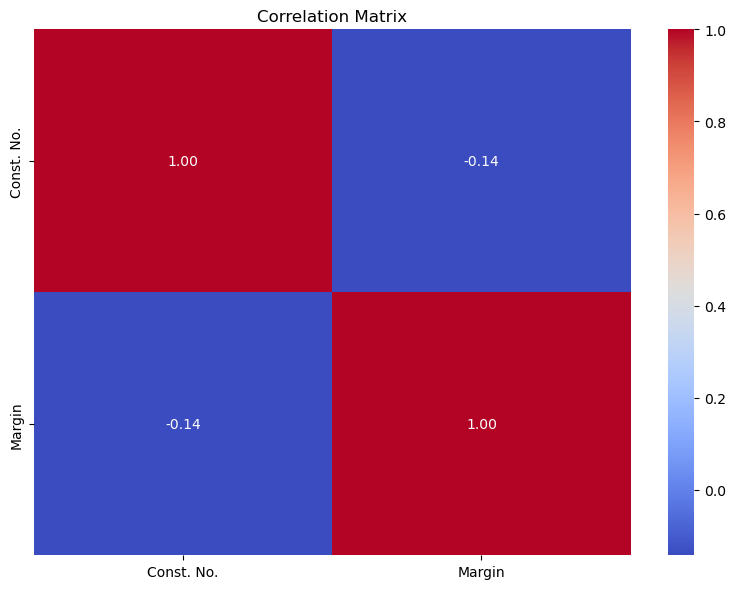

In [33]:
plt.figure(figsize=(8, 6))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

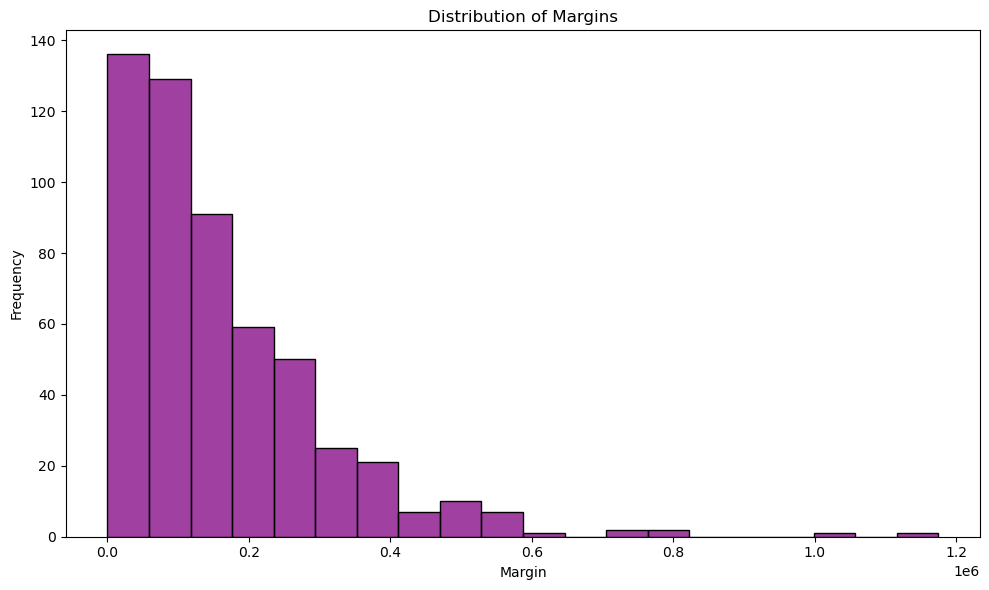

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Margin'].dropna(), bins=20, color='purple')
plt.title('Distribution of Margins')
plt.xlabel('Margin')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [39]:
trailing_party_votes = data.groupby('Trailing Party')['Margin'].sum().sort_values(ascending=False)
trailing_party_seats = data['Trailing Party'].value_counts()

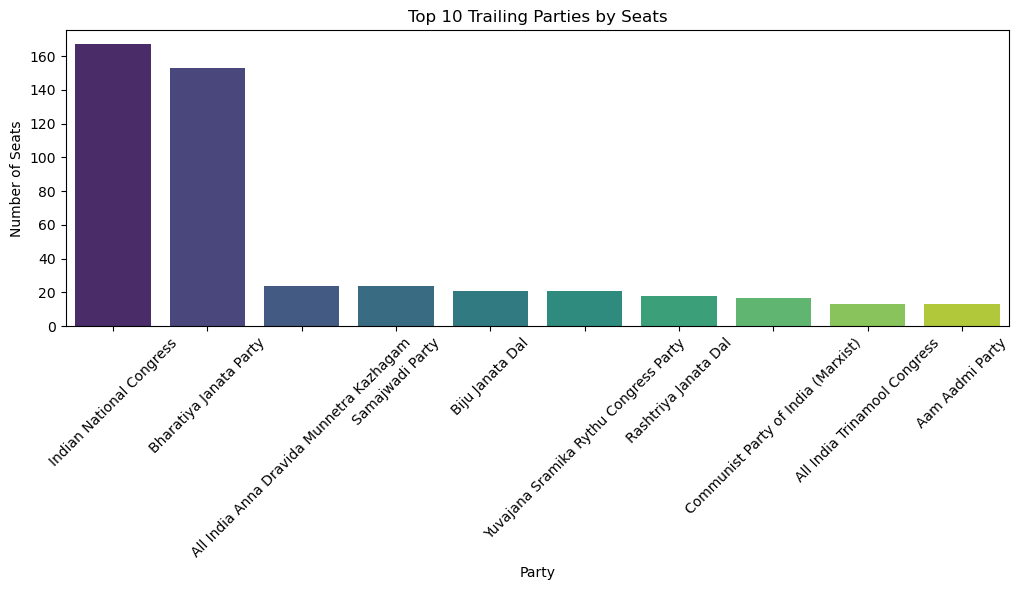

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 2)

# Create bar plot with 'hue' set to 'x' (trailing_party_seats.index[:10])
sns.barplot(x=trailing_party_seats.index[:10], y=trailing_party_seats.values[:10], hue=trailing_party_seats.index[:10], palette='viridis', dodge=False, legend=False)

# Customize plot labels and title
plt.title('Top 10 Trailing Parties by Seats')
plt.xlabel('Party')
plt.ylabel('Number of Seats')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
